In [9]:
# snippet from ~/Library/Jupyter/nbextensions/snippets/snippets.json
# basic
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('/Users/nknezek/code/MgSi-Exsolution/')
from mg_si import plot as mplt
import dill

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


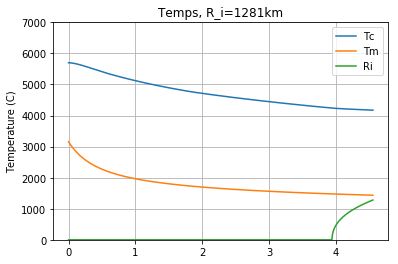

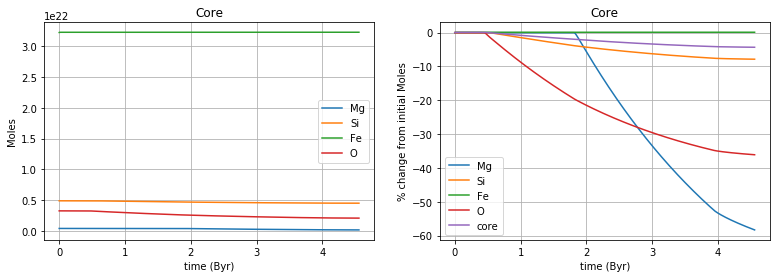

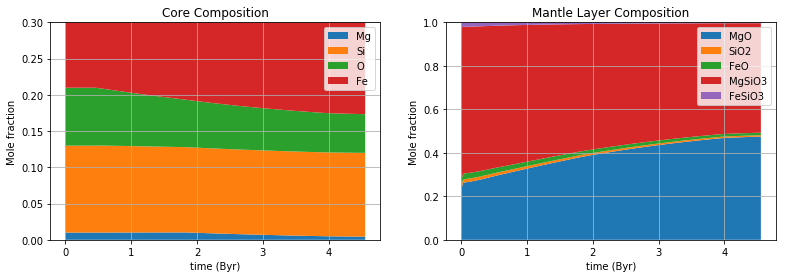

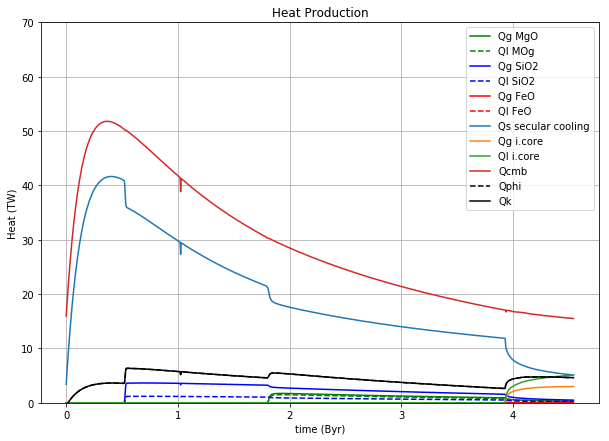

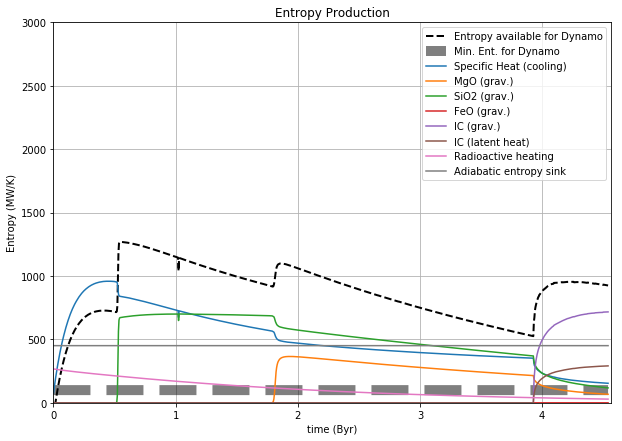

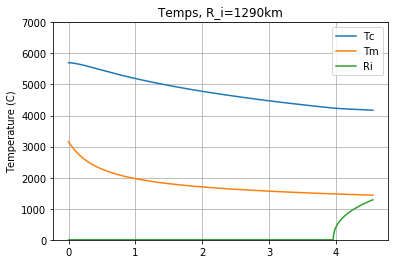

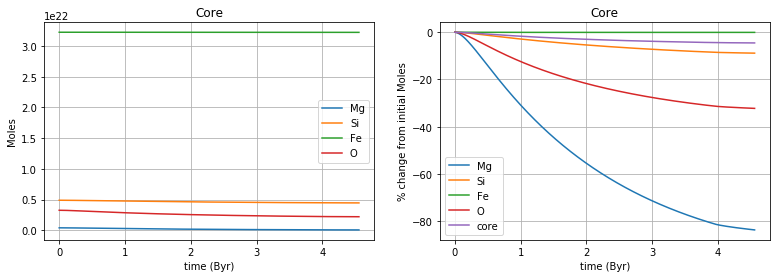

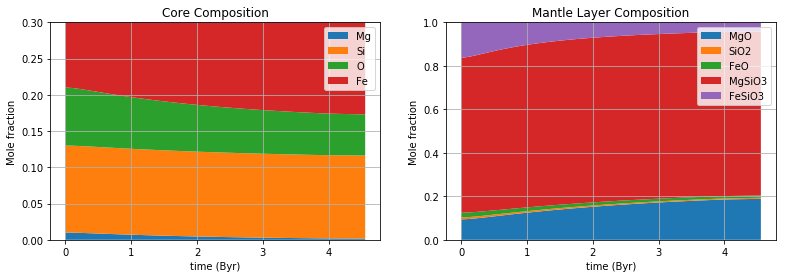

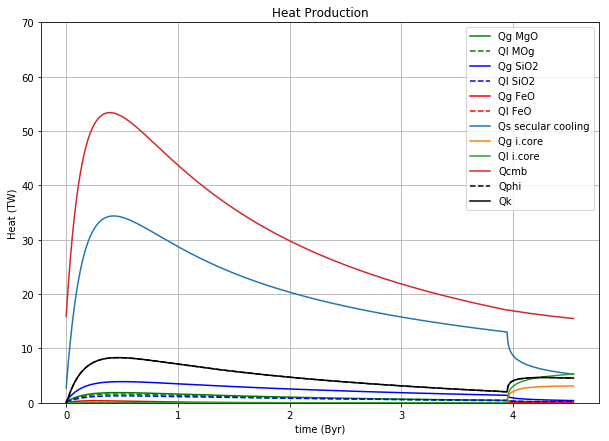

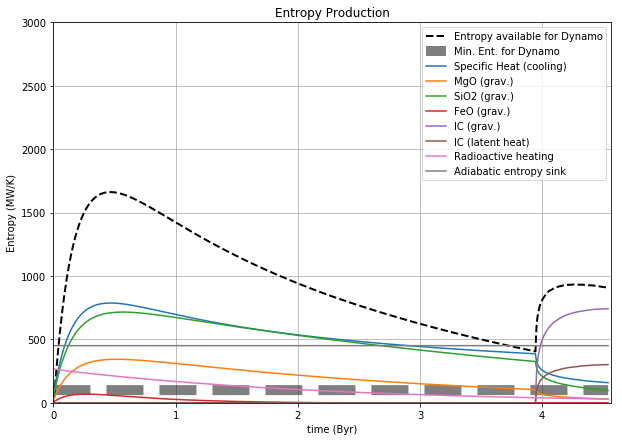

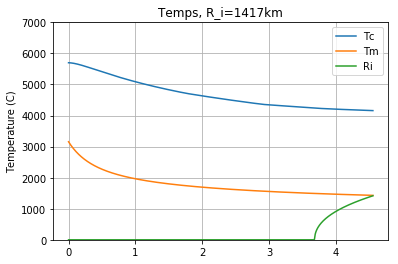

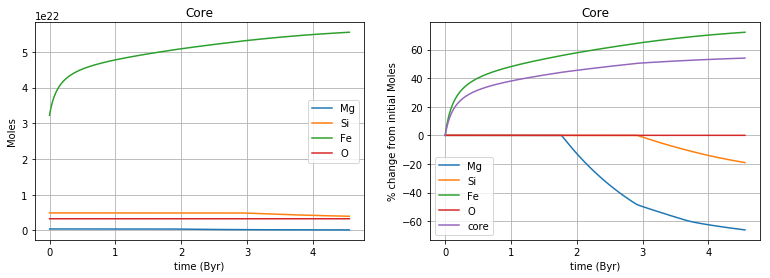

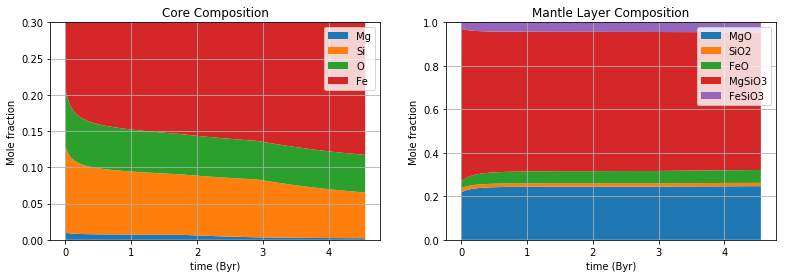

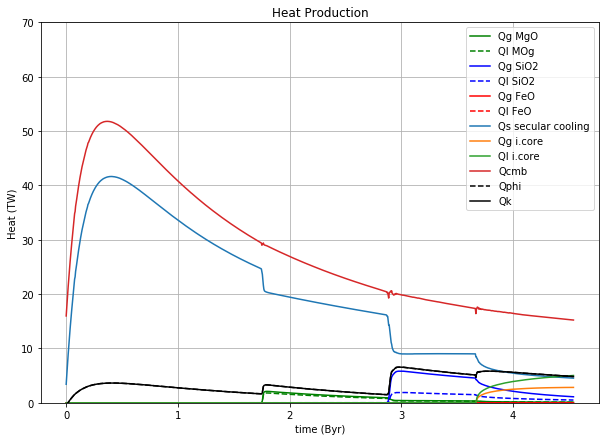

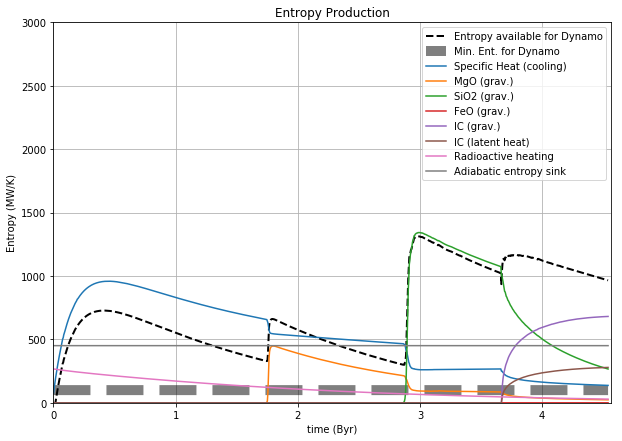

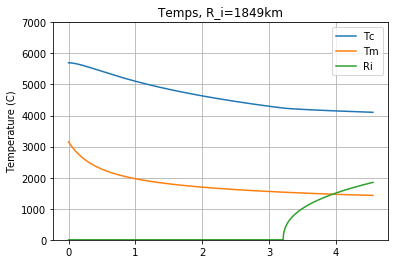

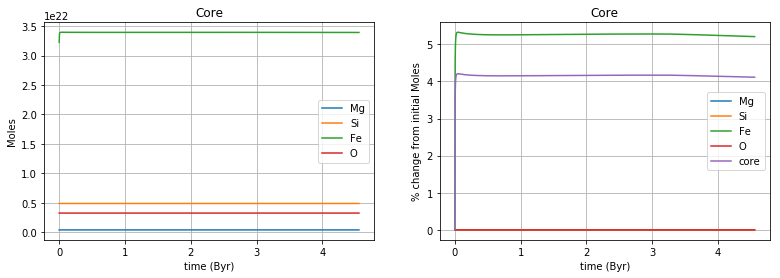

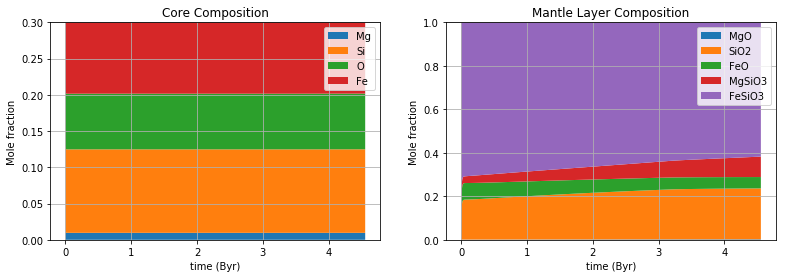

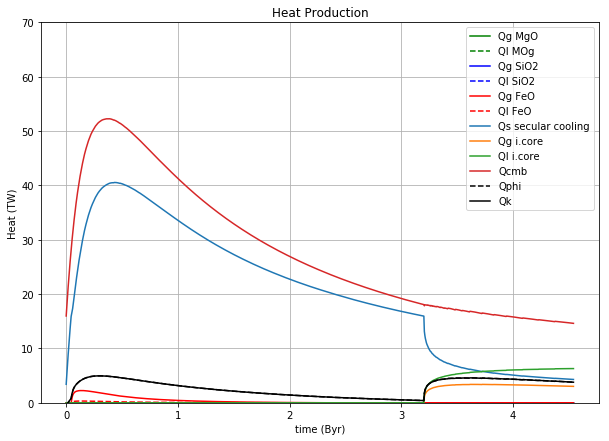

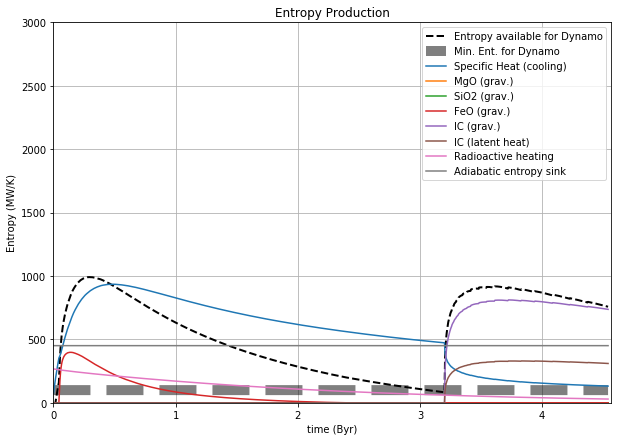

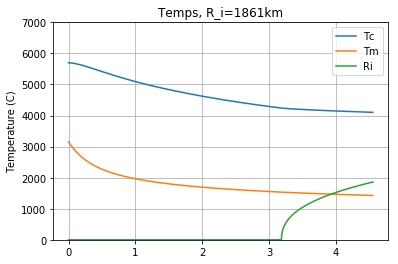

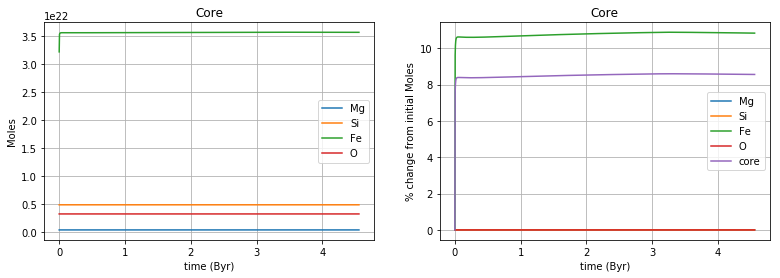

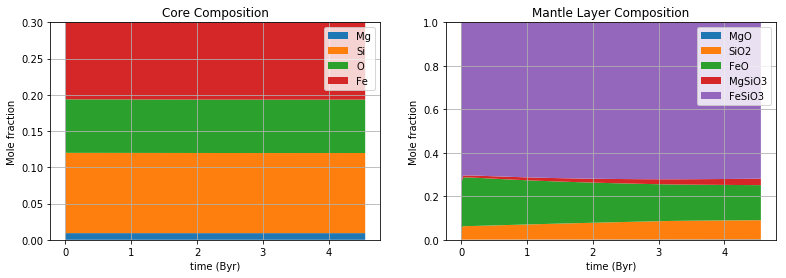

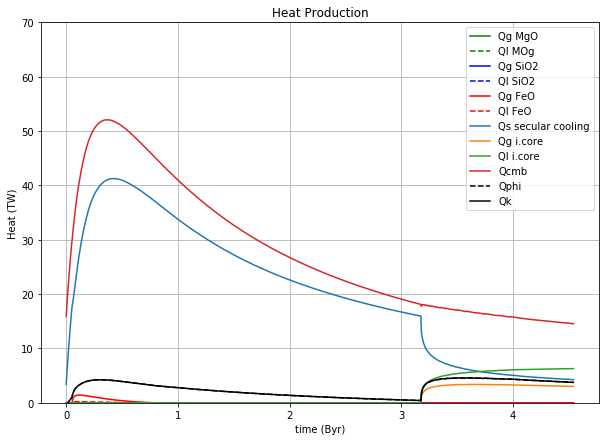

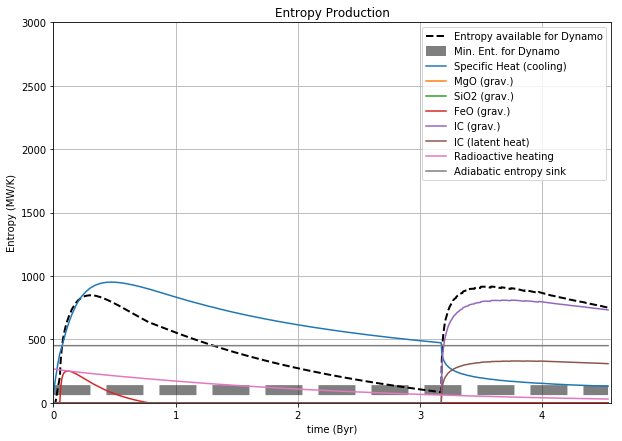

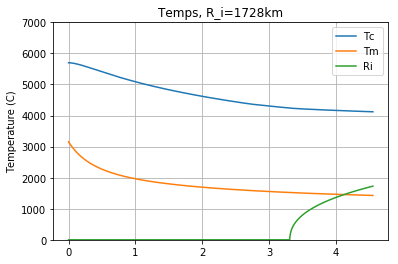

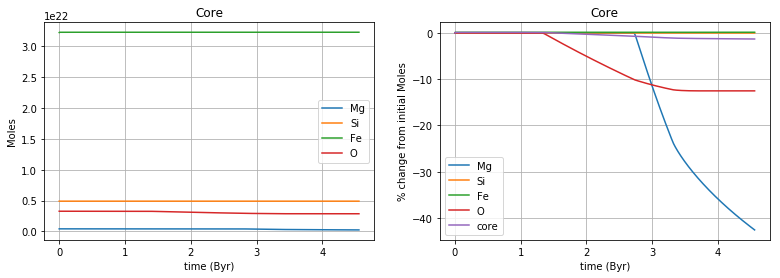

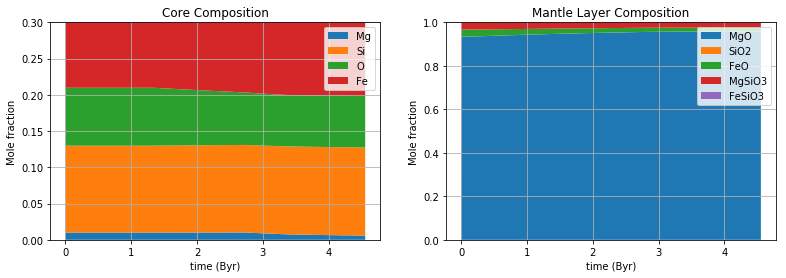

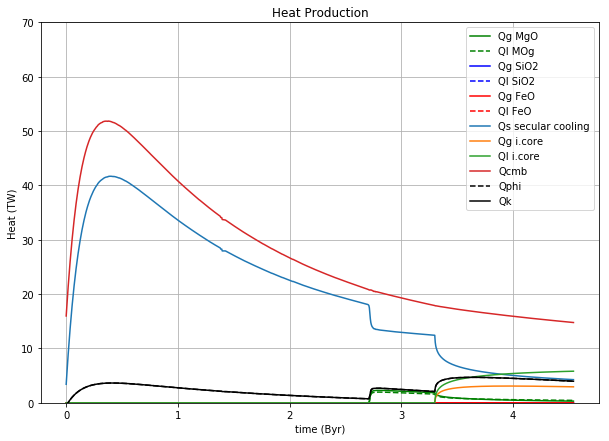

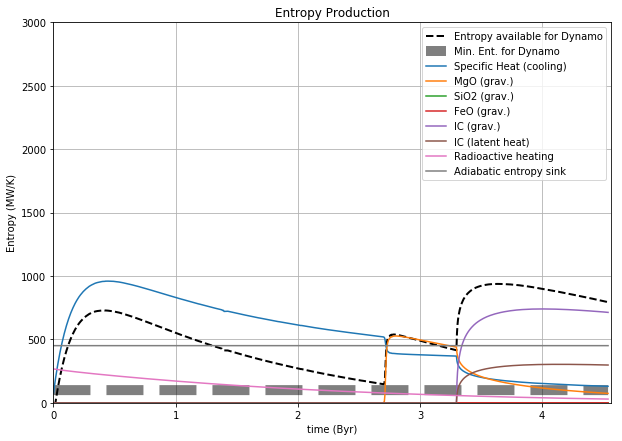

In [18]:
base = '/Users/nknezek/code/MgSi-Exsolution/comparison_runs/'
subfolder = 'Tc5700.0_XM0.010_XS0.120_XO0.080/'
datafile = 'data.m'


folders = ['base_comparison/','slow_mantle_overturn/','fast_mantle_overturn/','no_Mg_precip/','no_MgSi_precip/','no_Si_precip/']
for folder in folders:
    filepath = base+folder+subfolder
    with open(filepath+datafile, 'rb') as file:
        pl,times,solution = dill.load(file)
    mplt.temperature(pl, times, solution, filepath=filepath)
    mplt.coremoles(pl, times, solution, filepath=filepath)
    mplt.composition(pl, times, solution, filepath=filepath)
    try:
        t_N, all_parameters = dill.load(open(filepath+'new_parameters.m','rb'))
    except:
        t_N, all_parameters = pl.core_layer.compute_all_parameters(times, solution)
        dill.dump((t_N,all_parameters) ,open(filepath+'new_parameters.m','wb'))
    mplt.Q_all(pl, t_N, all_parameters, filepath=filepath)
    mplt.E_all(pl, t_N, all_parameters, filepath=filepath)



# Select Runs for Combination Figure

In [19]:
base = '/Users/nknezek/code/MgSi-Exsolution/comparison_runs/'
subfolder = 'Tc5700.0_XM0.010_XS0.120_XO0.080/'
datafile = 'data.m'

folders = ['base_comparison/','no_MgSi_precip/','no_Mg_precip/','no_Si_precip/','slow_mantle_overturn/','fast_mantle_overturn/']
for folder in folders:
    filepath = base+folder+subfolder
    with open(filepath+datafile, 'rb') as file:
        pl,times,solution = dill.load(file)
    try:
        t_N, all_parameters = dill.load(open(filepath+'new_parameters.m','rb'))
    except:
        t_N, all_parameters = pl.core_layer.compute_all_parameters(times, solution)
        dill.dump((t_N,all_parameters) ,open(filepath+'new_parameters.m','wb'))

In [20]:
import matplotlib as mpl
import matplotlib.path as mplPath
import matplotlib.patches as patches
from matplotlib import gridspec

def remove_outliers(t,y,percent=0.3, N=3):
    Nends = N-1
    yo = y + np.mean(y)*.1
    if np.isclose(np.mean(yo),0.):
        return t,np.zeros_like(y)
#     non_outliers = np.where( np.abs((y[:-Nends]+y[Nends:])/(Nends*y[Nends//2:-Nends//2])-1) < percent)[0]+Nends//2
    non_outliers = np.where( np.abs((yo[:-Nends]+yo[Nends:])/(2*yo[Nends//2:-Nends//2]) - 1) < percent)[0]+Nends//2
    return t[non_outliers], y[non_outliers]
cnames = ['FeO','MgO','SiO2','cooling']
Myrs = 365.25*24*3600*1e6

def get_color(cname):
    cnames = ['FeO','MgO','SiO2','cooling']
    coolcolor = (1,0,0,1)
    scolor = (0.2, 0.6274509803921569, 0.17254901960784313,1)
    fcolor  = (0.7294117647058823, 0.3333333333333333, 0.8274509803921568,1)
    mcolor = (0.0, 0.7490196078431373, 1.0,1)
    colors = [fcolor,mcolor,scolor, coolcolor]
    return colors[cnames.index(cname)]

def maxE_color(df, cvar='maxE'):
    cvals = df[cvar].fillna('FeO')
    colors = np.array([get_color(v) for v in cvals])
    if df[cvar].isnull().any():
        colors[df[cvar].isnull()] = (1,1,1,0)    
    return colors

def df_color(df, cvar = 'T_cmb0'):
    mi = np.min(df[cvar])
    cvals = (df[cvar]-mi)/(np.max(df[cvar])-mi)
    colors= plt.cm.rainbow(cvals)
    return colors

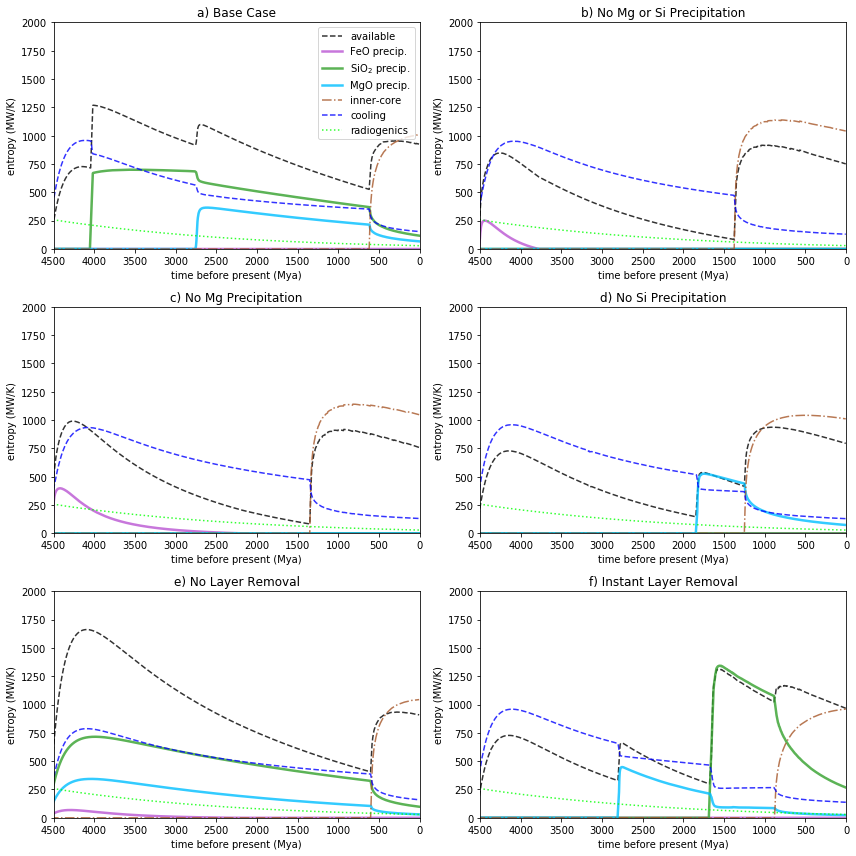

In [26]:
fstyle = '-'
mstyle = '-'
sstyle = '-'
ostyle = '-'

precip_color = 'blue'
cool_color = get_color('cooling')
fcolor = get_color('FeO')
fscolor = '#ff7f00'
mcolor = get_color('MgO')
mscolor = '#984ea3'
scolor = get_color('SiO2')
ocolor = '#ffff99'
iccolor = '#a65628'

exlw = 2.5
CE = 1e6
Emax = 2000
Emaxf = 3000
Myrs = 365.25 * 3600 * 24 * 1e6
xmin = 4500
xmax = 0
alpha = 0.8
fillalpha = 0.5

plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(3, 2)
titles = [
    'a) Base Case',
    'b) No Mg or Si Precipitation',
    'c) No Mg Precipitation',
    'd) No Si Precipitation',
    'e) No Layer Removal',
    'f) Instant Layer Removal',
]

for i, folder in enumerate(folders):
    ax = plt.subplot(gs[i])
    plt.title(titles[i])
    filepath = base + folder + subfolder
    t_plt, allp = dill.load(open(filepath + 'new_parameters.m', 'rb'))
    t_plt = t_plt[-1] - t_plt

    Efe = remove_outliers(t_plt, allp.Egf)
    Emg = remove_outliers(t_plt, allp.Egm)
    Esi = remove_outliers(t_plt, allp.Egs, percent=.01)
    Ek = remove_outliers(t_plt, allp.Ek)
    Eic = remove_outliers(t_plt, allp.Eg + allp.El)
    Es = remove_outliers(t_plt, allp.Es, percent=.01)
    Erc = remove_outliers(t_plt, allp.Er)
    Ephi = remove_outliers(t_plt, allp.Ephi, percent=.01)

    # plt.subplot(gs[0])
    plt.plot(
        Ephi[0] / Myrs,
        Ephi[1] / CE,
        '--',
        color='black',
        alpha=alpha,
        label=r'available')
    plt.plot(
        Efe[0] / Myrs,
        Efe[1] / CE,
        fstyle,
        color=fcolor,
        alpha=alpha,
        label=r'FeO precip.',
        lw=exlw)
    plt.plot(
        Esi[0] / Myrs,
        Esi[1] / CE,
        sstyle,
        color=scolor,
        alpha=alpha,
        label=r'SiO$_2$ precip.',
        lw=exlw)
    plt.plot(
        Emg[0] / Myrs,
        Emg[1] / CE,
        mstyle,
        color=mcolor,
        alpha=alpha,
        label=r'MgO precip.',
        lw=exlw)
    plt.plot(
        Eic[0] / Myrs,
        Eic[1] / CE,
        '-.',
        color=iccolor,
        alpha=alpha,
        label='inner-core')
    plt.plot(
        Es[0] / Myrs,
        Es[1] / CE,
        '--',
        color='blue',
        alpha=alpha,
        label='cooling')
    # plt.plot(Ek/CE, '-', color='blue', alpha=0.7, label='adiabat')
    plt.plot(
        Erc[0] / Myrs,
        Erc[1] / CE,
        ':',
        color='lime',
        alpha=alpha,
        label='radiogenics')
    # plt.legend(loc=0)
    plt.ylim(0, Emax)
    plt.xlim(xmin, xmax)

    ax.set_ylabel(r'entropy (MW/K)')
    ax.set_xlabel('time before present (Mya)')
    if i == 0:
        plt.legend()

plt.tight_layout()
plt.savefig('comparisons.pdf')